## Nathalie MAVEL Parcours Data-Scientist

### Projet 6 -- Classifier automatiquement des biens de consommations

In [219]:
# %%flake8  # checking PEP8 compliance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import functions.functions_p6 as functions_p6

# increase the maximum number of columns to display
pd.set_option('max_colwidth', 1000)
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)

In [220]:
from nltk.stem import SnowballStemmer

import re
from unidecode import unidecode

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [221]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir

In [223]:
import os
os.chdir('C:/Users/natha/Documents/OCR/DS_projet_6/flipkart')

In [224]:
data_init = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')
data_init.shape

(1050, 15)

In [225]:
# mettre en minuscule toutes les strings du df
df = data_init.apply(lambda x: x.str.lower() if(x.dtype == "object") else x)

In [226]:
# select varaiables
df = df[[ 'product_category_tree', 'description', 'image']]

**Identify categories**

In [227]:
#split first category
df[['category_first', 'category_detail']] = df['product_category_tree'].str.split(">>", 1, expand=True)

In [228]:
#split first category
df[['category_first', 'category_detail']] = df['product_category_tree'].str.split(">>", 1, expand=True)

# drop variables not used
df = df.drop(['category_detail', 'product_category_tree'], axis=1)

In [229]:
# drop punctuation in categor first
df['category_first'] = df['category_first'].str.replace('[{}]'.format(punctuation), '')
# drop spaceincategory first
df['category_first'] = df['category_first'].str.replace(' ', '')

<ipython-input-229-869128498dfb>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['category_first'] = df['category_first'].str.replace('[{}]'.format(punctuation), '')


In [230]:
df['category_first'].unique()

array(['homefurnishing', 'babycare', 'watches', 'homedecorfestiveneeds',
       'kitchendining', 'beautyandpersonalcare', 'computers'],
      dtype=object)

### Clean description

In [231]:
df['description'] = df['description'].str.replace('[{}]'.format(punctuation), ' ')

<ipython-input-231-648be105d39c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df['description'].str.replace('[{}]'.format(punctuation), ' ')


In [232]:
puncs = punctuation

In [233]:
df['description'] = df['description'].replace(str.maketrans('', '', puncs))

In [234]:
df['description'].head()

0    key features of elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain  213 cm in height  pack of 2  price  rs  899 this curtain enhances the look of the interiors this curtain is made from 100  high quality polyester fabric it features an eyelet style stitch with metal ring it makes the room environment romantic and loving this curtain is ant  wrinkle and anti shrinkage and have elegant apparance give your home a bright and modernistic appeal with these designs  the surreal attention is sure to steal hearts  these contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening  you create the most special moments of joyous beauty given by the soothing prints  bring home the elegant curtain that softly filters light in your room so that

In [235]:
df = df.replace("[\(\[].*?[\)\]]", "",regex=True)

In [236]:
# drop numbers
df['description'] = df['description'].str.replace('\d+', '')

<ipython-input-236-78ef28e2d73a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df['description'].str.replace('\d+', '')


In [237]:
# define stopwords
sw = set(stopwords.words('english'))

In [238]:
# drop stopwords
df['description'] = df['description'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (sw)]))

In [239]:
# drop 1 character unique
import string
alpha = list(string.ascii_lowercase)

In [240]:
df['description'] = df['description'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (alpha)]))

In [241]:
# drop quantities units

from quantities import units

unit_symbols = [u.symbol for _, u in units.__dict__.items()
    if isinstance(u, type(units.deg))]

In [242]:
df['description'] = df['description'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (unit_symbols)]))

In [243]:
#  lemmatization
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    lemmatizer_list = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    lemmatizer_list = ' '.join(str(v) for v in lemmatizer_list)
    
    return lemmatizer_list

In [244]:
df['lemmatized_text'] = df.description.apply(lemmatize_text)

In [245]:
df['lemmatized_text'] = df['lemmatized_text'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (alpha)]))

In [246]:
# df['lemmatized_text'] = df['lemmatized_text'].apply(
#         lambda x: ' '.join([word for word in x.split() if word not in (sw2)]))

In [247]:
df.head(1)

,description,image,category_first,lemmatized_text
0,key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack price rs curtain enhances look interiors curtain made high quality polyester fabric features eyelet style stitch metal ring makes room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal designs surreal attention sure steal hearts contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight specifications elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimensions length box number...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,homefurnishing,key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack price curtain enhances look interior curtain made high quality polyester fabric feature eyelet style stitch metal ring make room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight specification elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimension length box number content sale pa...


In [248]:
#  Tokenisation
df['tokenize_text'] = df['description'].apply(word_tokenize)

In [249]:
df.head(1)

,description,image,category_first,lemmatized_text,tokenize_text
0,key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack price rs curtain enhances look interiors curtain made high quality polyester fabric features eyelet style stitch metal ring makes room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal designs surreal attention sure steal hearts contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight specifications elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimensions length box number...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,homefurnishing,key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack price curtain enhances look interior curtain made high quality polyester fabric feature eyelet style stitch metal ring make room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight specification elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimension length box number content sale pa...,"[key, features, elegance, polyester, multicolor, abstract, eyelet, door, curtain, floral, curtain, elegance, polyester, multicolor, abstract, eyelet, door, curtain, height, pack, price, rs, curtain, enhances, look, interiors, curtain, made, high, quality, polyester, fabric, features, eyelet, style, stitch, metal, ring, makes, room, environment, romantic, loving, curtain, ant, wrinkle, anti, shrinkage, elegant, apparance, give, home, bright, modernistic, appeal, designs, surreal, attention, sure, steal, hearts, contemporary, eyelet, valance, curtains, slide, smoothly, draw, apart, first, thing, morning, welcome, bright, sun, rays, want, wish, good, morning, whole, world, draw, close, evening, create, special, moments, joyous, beauty, given, soothing, prints, bring, home, elegant, curtain, softly, filters, light, ...]"


In [250]:
#  stemmatisation
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [251]:
df['stemmed_text'] = df['tokenize_text'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

In [252]:
df.head(1)

,description,image,category_first,lemmatized_text,tokenize_text,stemmed_text
0,key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack price rs curtain enhances look interiors curtain made high quality polyester fabric features eyelet style stitch metal ring makes room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal designs surreal attention sure steal hearts contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight specifications elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimensions length box number...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,homefurnishing,key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack price curtain enhances look interior curtain made high quality polyester fabric feature eyelet style stitch metal ring make room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance give home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight specification elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model id duster color multicolor dimension length box number content sale pa...,"[key, features, elegance, polyester, multicolor, abstract, eyelet, door, curtain, floral, curtain, elegance, polyester, multicolor, abstract, eyelet, door, curtain, height, pack, price, rs, curtain, enhances, look, interiors, curtain, made, high, quality, polyester, fabric, features, eyelet, style, stitch, metal, ring, makes, room, environment, romantic, loving, curtain, ant, wrinkle, anti, shrinkage, elegant, apparance, give, home, bright, modernistic, appeal, designs, surreal, attention, sure, steal, hearts, contemporary, eyelet, valance, curtains, slide, smoothly, draw, apart, first, thing, morning, welcome, bright, sun, rays, want, wish, good, morning, whole, world, draw, close, evening, create, special, moments, joyous, beauty, given, soothing, prints, bring, home, elegant, curtain, softly, filters, light, ...]","[key, featur, eleg, polyest, multicolor, abstract, eyelet, door, curtain, floral, curtain, eleg, polyest, multicolor, abstract, eyelet, door, curtain, height, pack, price, rs, curtain, enhanc, look, interior, curtain, made, high, qualiti, polyest, fabric, featur, eyelet, style, stitch, metal, ring, make, room, environ, romant, love, curtain, ant, wrinkl, anti, shrinkag, eleg, appar, give, home, bright, modernist, appeal, design, surreal, attent, sure, steal, heart, contemporari, eyelet, valanc, curtain, slide, smooth, draw, apart, first, thing, morn, welcom, bright, sun, ray, want, wish, good, morn, whole, world, draw, close, even, creat, special, moment, joyous, beauti, given, sooth, print, bring, home, eleg, curtain, soft, filter, light, ...]"


### Select DF with lemmatized

In [253]:
df_clean = df[['image', 'category_first', 'lemmatized_text']]

In [254]:
stopwords = (nltk.corpus.stopwords.words('english'))
most_common = freq_totale.most_common(50)

In [255]:
common_words = []
for a_tuple in most_common:
    common_words.append(a_tuple[0])

In [256]:
df_clean['lemmatized_text'] = df_clean['lemmatized_text'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (common_words)]))

<ipython-input-256-1be03400a609>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['lemmatized_text'] = df_clean['lemmatized_text'].apply(


In [257]:
# stotword add manually
sw2 = ['key', 'feature', 'elegance', 'price', 'best', 
       'product', 'shipping', 'cash', "delivery", 'day', 'genuine', 'sale', 'asvtwl', 'artrmmw', 'aapno']

In [258]:
df_clean['lemmatized_text'] = df_clean['lemmatized_text'].apply(
        lambda x: ' '.join([word for word in x.split() if word not in (sw2)]))

<ipython-input-258-474d20e4f9a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['lemmatized_text'] = df_clean['lemmatized_text'].apply(


In [259]:
df_clean.head(1)

,image,category_first,lemmatized_text
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,homefurnishing,polyester abstract eyelet door curtain floral curtain polyester abstract eyelet door curtain pack curtain enhances interior curtain made quality polyester fabric eyelet stitch metal ring room environment romantic loving curtain ant wrinkle anti shrinkage elegant apparance bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing bring elegant curtain softly filter room get right amount sunlight specification polyester abstract eyelet door curtain pack general brand designed door type eyelet model abstract polyester door curtain set model id duster color box number package pack package curtain design material polyester


In [260]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instanciation of the tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    analyzer='word',
    max_df=0.8, # reduction dimensions
    min_df=3, # reduction dimensions
    ngram_range=(1, 1),
)

# Application of the tf-idf vectorizer
corpus = df_clean['lemmatized_text']
X = tfidf_vectorizer.fit_transform(corpus)
# Conversion to a dense array for later use
X_dense = X.todense()

y = X.toarray()
print('TF-DF : ')
print('Size of the vocabulary: {}'.format(len(list(tfidf_vectorizer.vocabulary_))))
print('Number of stop words: {}'.format(len(tfidf_vectorizer.stop_words_)))

TF-DF : 
Size of the vocabulary: 1338
Number of stop words: 3160


## pca 

In [261]:
from sklearn.decomposition import PCA

In [262]:
tfidfvectorizer = TfidfVectorizer(max_df=0.90, min_df=0.01, ngram_range=(1, 2))
features = tfidfvectorizer.fit_transform(df_clean["lemmatized_text"])

tfidf_tokens = pd.DataFrame(features.todense(), columns=tfidfvectorizer.get_feature_names_out())

pca = PCA(random_state=0)
df_pca = pca.fit_transform(tfidf_tokens)

In [263]:
# on a bien une réduction de dimensions
df_pca.shape

(1050, 719)

In [264]:
df_pca_2 = pd.DataFrame(df_pca, columns=tfidfvectorizer.get_feature_names_out())

In [265]:
df_pca_3 = df_pca_2.abs()

## Latent Dirichlet Allocation (LDA)

In [267]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 7

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=10, 
        learning_method='online', 
        learning_offset=50.,
        random_state=1)

In [268]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return (topic_idx)

no_top_words = 10

In [269]:
def plot_LDA(components):
    # importing libraries
    import matplotlib.pyplot as plt

    # Setting the data to plot
    labels = ['topic_{}'.format(i) for i in range(len(components))]
    frequencies = components

    # Graphical properties of the main figure
    fig = plt.figure(figsize=(14, 6))

    # Main graphical properties of the second subplot (pieplot)
    plt.title("Belonging to topics (LDA)", fontsize=20)

    # plotting the plots
    plt.pie(frequencies,
                autopct='%1.0f%%',
                  )

    plt.legend(labels, loc='upper right',fontsize=10)
    plt.show()
    return fig

In [270]:
# Fitter sur les données
lda.fit(df_pca_3)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          n_components=7, random_state=1)

In [271]:
display_topics(lda, tfidfvectorizer.get_feature_names_out(), 10)

Topic 0:
abstract ac add actual back case add kitchen age additional detail aluminium base
Topic 1:
abstract single adorable fantastic abstract affordable mug affordable ac additional detail age analog watch add
Topic 2:
abstract abstract single ac add accessory actual add kitchen additional detail adorable analog
Topic 3:
abstract add affordable buckle clasp bleach bottle aroma ceramic material authentication base
Topic 4:
ac abstract adorable fantastic add kitchen abstract single brand add boy buy back case case
Topic 5:
ac abstract accessory bed additional detail add affordable add kitchen box actual
Topic 6:
abstract adorable fantastic abstract single affordable add accessory apple beautifully designed audio aroma


6

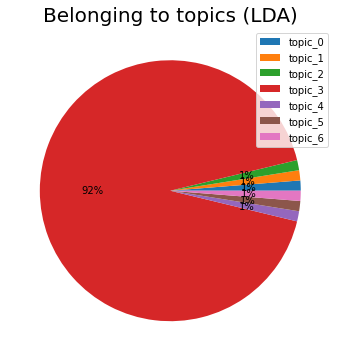

In [272]:
# Belonging to topics for first item
plot_LDA(text_LDA[0,:]);